In [1]:
%matplotlib inline

import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from collections import Counter
from itertools import count
from sklearn.model_selection import StratifiedShuffleSplit
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.layers import Dense, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import backend as K

from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
IMG_W = 28
IMG_H = 28
BATCH_SIZE = 500
TEST_SIZE = 750
NUM_EPOCHS = 200
NUM_CLASSES = 12
NUM_CHANNELS = 7

In [3]:
def load_images(path, extract_class=True):
    for index, file in enumerate(glob(path), 1):
        cls = file.split('\\')[1] if extract_class else None
        bgr = cv2.imread(file)
        bgr = cv2.resize(bgr, dsize=(IMG_H, IMG_W), interpolation=cv2.INTER_CUBIC)
        hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(
            hsv,
            (24, 50, 0),
            (55, 255, 140)
        )
        img = np.concatenate([bgr, hsv, mask[..., np.newaxis]], axis=-1)
        print(f'{index:04d}: {file}')
        yield img, cls

In [4]:
le = LabelEncoder()

X_train, Y_train = zip(*load_images(path='train\*\*.png', extract_class=True))
X_train = np.array(X_train)
Y_train = to_categorical(le.fit_transform(Y_train), num_classes=NUM_CLASSES)

X_test, _ = zip(*load_images(path='test\*.png', extract_class=False))
X_test = np.array(X_test)

0001: train\Black-grass\0050f38b3.png
0002: train\Black-grass\0183fdf68.png
0003: train\Black-grass\0260cffa8.png
0004: train\Black-grass\05eedce4d.png
0005: train\Black-grass\075d004bc.png
0006: train\Black-grass\078eae073.png
0007: train\Black-grass\082314602.png
0008: train\Black-grass\0ace21089.png
0009: train\Black-grass\0b228a6b8.png
0010: train\Black-grass\0b3e7a7a9.png
0011: train\Black-grass\0bb75ded8.png
0012: train\Black-grass\0be707615.png
0013: train\Black-grass\0c67c3fc3.png
0014: train\Black-grass\0d1a9985f.png
0015: train\Black-grass\0d28c429b.png
0016: train\Black-grass\0d4f74f4a.png
0017: train\Black-grass\0dad57e7f.png
0018: train\Black-grass\0e91f92a1.png
0019: train\Black-grass\0fe440ed5.png
0020: train\Black-grass\1276dffba.png
0021: train\Black-grass\129c51855.png
0022: train\Black-grass\13a7f553a.png
0023: train\Black-grass\14719a83e.png
0024: train\Black-grass\1576ce9fd.png
0025: train\Black-grass\163c13912.png
0026: train\Black-grass\163e571a6.png
0027: train\

0218: train\Black-grass\d441eeda3.png
0219: train\Black-grass\d6036a0f4.png
0220: train\Black-grass\d622ca3d2.png
0221: train\Black-grass\d8afd58f3.png
0222: train\Black-grass\da4f48653.png
0223: train\Black-grass\da5082ce2.png
0224: train\Black-grass\daa7d4620.png
0225: train\Black-grass\db337c4e7.png
0226: train\Black-grass\dca86daba.png
0227: train\Black-grass\dcbd3fa08.png
0228: train\Black-grass\dd091a2a9.png
0229: train\Black-grass\dde665ea5.png
0230: train\Black-grass\df2e6e002.png
0231: train\Black-grass\e0380dff9.png
0232: train\Black-grass\e2b2a20b2.png
0233: train\Black-grass\e47987eab.png
0234: train\Black-grass\e4af651a3.png
0235: train\Black-grass\e5a6e8ebc.png
0236: train\Black-grass\e5f50d22a.png
0237: train\Black-grass\e62aa6d6e.png
0238: train\Black-grass\e67dbce63.png
0239: train\Black-grass\e7d7e6351.png
0240: train\Black-grass\ea498dd9c.png
0241: train\Black-grass\ea85eb4a1.png
0242: train\Black-grass\eac39cfa8.png
0243: train\Black-grass\ebd2350df.png
0244: train\

0460: train\Charlock\8705afe70.png
0461: train\Charlock\87168f1c7.png
0462: train\Charlock\88c2c6f8a.png
0463: train\Charlock\88c5a0b11.png
0464: train\Charlock\88c8cbb35.png
0465: train\Charlock\89b586174.png
0466: train\Charlock\89b84d6e9.png
0467: train\Charlock\8b35222d0.png
0468: train\Charlock\8b3f0fba7.png
0469: train\Charlock\8c9c6b343.png
0470: train\Charlock\8cc7a03c6.png
0471: train\Charlock\8d16914a3.png
0472: train\Charlock\8dd1dbca2.png
0473: train\Charlock\8de73f114.png
0474: train\Charlock\8df0f80e9.png
0475: train\Charlock\8f4d248bd.png
0476: train\Charlock\903fff84f.png
0477: train\Charlock\90981bf00.png
0478: train\Charlock\90faa7ccd.png
0479: train\Charlock\92184e2d6.png
0480: train\Charlock\921ef57b0.png
0481: train\Charlock\92209cbd5.png
0482: train\Charlock\946b7baea.png
0483: train\Charlock\94af3e45a.png
0484: train\Charlock\95d959662.png
0485: train\Charlock\961517fac.png
0486: train\Charlock\97907da1a.png
0487: train\Charlock\982f40990.png
0488: train\Charlock

0698: train\Cleavers\1e5041183.png
0699: train\Cleavers\1e510607e.png
0700: train\Cleavers\1ef8ef4af.png
0701: train\Cleavers\1ffcc6d2c.png
0702: train\Cleavers\20964b9b7.png
0703: train\Cleavers\2261906cf.png
0704: train\Cleavers\2297085a0.png
0705: train\Cleavers\252585ad8.png
0706: train\Cleavers\2559137f2.png
0707: train\Cleavers\265a7f826.png
0708: train\Cleavers\294d28c60.png
0709: train\Cleavers\299190b08.png
0710: train\Cleavers\2a1d10e06.png
0711: train\Cleavers\2baa68b6e.png
0712: train\Cleavers\2c5c4d127.png
0713: train\Cleavers\2e47c7233.png
0714: train\Cleavers\2e547d792.png
0715: train\Cleavers\2e97487c4.png
0716: train\Cleavers\2f38351b7.png
0717: train\Cleavers\30418535b.png
0718: train\Cleavers\3232000bf.png
0719: train\Cleavers\323f03521.png
0720: train\Cleavers\33c1f167f.png
0721: train\Cleavers\33d0d3358.png
0722: train\Cleavers\34648ed0b.png
0723: train\Cleavers\34f210a03.png
0724: train\Cleavers\3516267fc.png
0725: train\Cleavers\360f883f6.png
0726: train\Cleavers

0934: train\Cleavers\f9f3c4595.png
0935: train\Cleavers\fab297bc9.png
0936: train\Cleavers\fc26df0cf.png
0937: train\Cleavers\fd2400d5f.png
0938: train\Cleavers\fd2683ed1.png
0939: train\Cleavers\fd5074d77.png
0940: train\Cleavers\feecf1be6.png
0941: train\Common Chickweed\00b6eee9f.png
0942: train\Common Chickweed\00ba5f88a.png
0943: train\Common Chickweed\00d33935c.png
0944: train\Common Chickweed\0118f1f70.png
0945: train\Common Chickweed\017a3000a.png
0946: train\Common Chickweed\019c3bbea.png
0947: train\Common Chickweed\01eef6041.png
0948: train\Common Chickweed\024b144e3.png
0949: train\Common Chickweed\02ad544a4.png
0950: train\Common Chickweed\02beb950e.png
0951: train\Common Chickweed\0331a0d41.png
0952: train\Common Chickweed\0366e36eb.png
0953: train\Common Chickweed\036eca712.png
0954: train\Common Chickweed\037295da4.png
0955: train\Common Chickweed\04526c399.png
0956: train\Common Chickweed\04b597a3f.png
0957: train\Common Chickweed\04baa9ae6.png
0958: train\Common Chick

1164: train\Common Chickweed\53585f37d.png
1165: train\Common Chickweed\54a3a899b.png
1166: train\Common Chickweed\5629b467c.png
1167: train\Common Chickweed\5687df8c6.png
1168: train\Common Chickweed\56a3e134b.png
1169: train\Common Chickweed\56f69db16.png
1170: train\Common Chickweed\5713630ed.png
1171: train\Common Chickweed\57664aa6b.png
1172: train\Common Chickweed\57731eb29.png
1173: train\Common Chickweed\5790e7b05.png
1174: train\Common Chickweed\57c3c7b86.png
1175: train\Common Chickweed\57eaf2687.png
1176: train\Common Chickweed\58aeb692f.png
1177: train\Common Chickweed\58b405634.png
1178: train\Common Chickweed\58f366d30.png
1179: train\Common Chickweed\593e2f0e9.png
1180: train\Common Chickweed\5a044c06b.png
1181: train\Common Chickweed\5ace4b78d.png
1182: train\Common Chickweed\5b4414b1e.png
1183: train\Common Chickweed\5b4b5f5ca.png
1184: train\Common Chickweed\5ba9f6698.png
1185: train\Common Chickweed\5c62f507e.png
1186: train\Common Chickweed\5c82a988b.png
1187: train

1373: train\Common Chickweed\adf3032af.png
1374: train\Common Chickweed\ae7415e25.png
1375: train\Common Chickweed\af005febb.png
1376: train\Common Chickweed\af98e2c11.png
1377: train\Common Chickweed\afeabc763.png
1378: train\Common Chickweed\b0b543038.png
1379: train\Common Chickweed\b116fabdd.png
1380: train\Common Chickweed\b176751f4.png
1381: train\Common Chickweed\b25c85290.png
1382: train\Common Chickweed\b2b8055ad.png
1383: train\Common Chickweed\b35eaa0a1.png
1384: train\Common Chickweed\b40d58c8e.png
1385: train\Common Chickweed\b48e67073.png
1386: train\Common Chickweed\b4bf76e9f.png
1387: train\Common Chickweed\b4e188202.png
1388: train\Common Chickweed\b53c5ac08.png
1389: train\Common Chickweed\b61695466.png
1390: train\Common Chickweed\b8e6c7b66.png
1391: train\Common Chickweed\b953bb136.png
1392: train\Common Chickweed\b962fdcfc.png
1393: train\Common Chickweed\b9c8f7046.png
1394: train\Common Chickweed\b9f4cec11.png
1395: train\Common Chickweed\bb52da32b.png
1396: train

1577: train\Common wheat\18fe42109.png
1578: train\Common wheat\1a5243aa7.png
1579: train\Common wheat\1a6add1b0.png
1580: train\Common wheat\1a9a859c9.png
1581: train\Common wheat\1d80baed6.png
1582: train\Common wheat\1e3f2459f.png
1583: train\Common wheat\200457edd.png
1584: train\Common wheat\2163a30d4.png
1585: train\Common wheat\21f36bdf0.png
1586: train\Common wheat\22893299b.png
1587: train\Common wheat\22ad759f1.png
1588: train\Common wheat\23c21923f.png
1589: train\Common wheat\297e193dc.png
1590: train\Common wheat\2c4412af8.png
1591: train\Common wheat\2c4813e68.png
1592: train\Common wheat\2d59da822.png
1593: train\Common wheat\2e7881f74.png
1594: train\Common wheat\2eb324e28.png
1595: train\Common wheat\2f45d4b13.png
1596: train\Common wheat\30c632d2a.png
1597: train\Common wheat\33870e597.png
1598: train\Common wheat\3620378ef.png
1599: train\Common wheat\373a8d06b.png
1600: train\Common wheat\39f8f1c54.png
1601: train\Common wheat\3a40ee68b.png
1602: train\Common wheat\

1819: train\Fat Hen\190b948d5.png
1820: train\Fat Hen\193f4c946.png
1821: train\Fat Hen\19bd579f5.png
1822: train\Fat Hen\19c84bc7c.png
1823: train\Fat Hen\19fc23481.png
1824: train\Fat Hen\1a5354a5b.png
1825: train\Fat Hen\1bcdf1f95.png
1826: train\Fat Hen\1bdf63082.png
1827: train\Fat Hen\1c4f59d14.png
1828: train\Fat Hen\1d9743b35.png
1829: train\Fat Hen\1df9e7301.png
1830: train\Fat Hen\1e9c7a82f.png
1831: train\Fat Hen\1eb0d7c5f.png
1832: train\Fat Hen\1fb586773.png
1833: train\Fat Hen\207d4e9ce.png
1834: train\Fat Hen\211c3f24f.png
1835: train\Fat Hen\214f2dbcb.png
1836: train\Fat Hen\2160ec61c.png
1837: train\Fat Hen\216b1daa0.png
1838: train\Fat Hen\22cd06b64.png
1839: train\Fat Hen\22d4656ff.png
1840: train\Fat Hen\23525c578.png
1841: train\Fat Hen\23a4cbe43.png
1842: train\Fat Hen\2412cb19b.png
1843: train\Fat Hen\2509e5bc5.png
1844: train\Fat Hen\25ff4825d.png
1845: train\Fat Hen\26220c5b7.png
1846: train\Fat Hen\268e72cee.png
1847: train\Fat Hen\2719ff172.png
1848: train\Fa

2079: train\Fat Hen\ac502b28e.png
2080: train\Fat Hen\ac50d45a7.png
2081: train\Fat Hen\ac6625b0f.png
2082: train\Fat Hen\ac88a6662.png
2083: train\Fat Hen\ad58587fb.png
2084: train\Fat Hen\ad5ee2832.png
2085: train\Fat Hen\afac20b21.png
2086: train\Fat Hen\b0398be3d.png
2087: train\Fat Hen\b039fd244.png
2088: train\Fat Hen\b07391323.png
2089: train\Fat Hen\b2f74bf81.png
2090: train\Fat Hen\b3e1dda94.png
2091: train\Fat Hen\b43d0a350.png
2092: train\Fat Hen\b4e6ee3d2.png
2093: train\Fat Hen\b4e738f6b.png
2094: train\Fat Hen\b4fd78671.png
2095: train\Fat Hen\b59aec1e1.png
2096: train\Fat Hen\b88da8e21.png
2097: train\Fat Hen\b89d9f403.png
2098: train\Fat Hen\b8e176ae8.png
2099: train\Fat Hen\b8e3dd9ae.png
2100: train\Fat Hen\ba5c8f87f.png
2101: train\Fat Hen\ba9dc6742.png
2102: train\Fat Hen\bbcb520e8.png
2103: train\Fat Hen\bbcc5bbb2.png
2104: train\Fat Hen\bbee46239.png
2105: train\Fat Hen\bc10332f0.png
2106: train\Fat Hen\bcb9e211a.png
2107: train\Fat Hen\bcbbdd3bd.png
2108: train\Fa

2320: train\Loose Silky-bent\20df07699.png
2321: train\Loose Silky-bent\20f5b6513.png
2322: train\Loose Silky-bent\217b3e661.png
2323: train\Loose Silky-bent\217c20421.png
2324: train\Loose Silky-bent\21f99c5c2.png
2325: train\Loose Silky-bent\2220076ca.png
2326: train\Loose Silky-bent\2240f47fd.png
2327: train\Loose Silky-bent\224274f93.png
2328: train\Loose Silky-bent\230282373.png
2329: train\Loose Silky-bent\230461e8b.png
2330: train\Loose Silky-bent\2399027ab.png
2331: train\Loose Silky-bent\240ad1daf.png
2332: train\Loose Silky-bent\2424d70aa.png
2333: train\Loose Silky-bent\25b804889.png
2334: train\Loose Silky-bent\25c3965e9.png
2335: train\Loose Silky-bent\25c91550e.png
2336: train\Loose Silky-bent\267ced076.png
2337: train\Loose Silky-bent\26ec4cf7d.png
2338: train\Loose Silky-bent\26f6c56c0.png
2339: train\Loose Silky-bent\273a79f87.png
2340: train\Loose Silky-bent\2773b77ab.png
2341: train\Loose Silky-bent\278d7ff5d.png
2342: train\Loose Silky-bent\27b301a16.png
2343: train

2519: train\Loose Silky-bent\698ce4468.png
2520: train\Loose Silky-bent\69a3ef92d.png
2521: train\Loose Silky-bent\6a6b4d0ad.png
2522: train\Loose Silky-bent\6aa8cc9d9.png
2523: train\Loose Silky-bent\6ad2ae242.png
2524: train\Loose Silky-bent\6af4dbc15.png
2525: train\Loose Silky-bent\6b006cb85.png
2526: train\Loose Silky-bent\6bbc3e3dd.png
2527: train\Loose Silky-bent\6bf6d3f24.png
2528: train\Loose Silky-bent\6c4d469c8.png
2529: train\Loose Silky-bent\6c9de038f.png
2530: train\Loose Silky-bent\6ca0979d0.png
2531: train\Loose Silky-bent\6d0ad6911.png
2532: train\Loose Silky-bent\6d2f11b51.png
2533: train\Loose Silky-bent\6d78ef24f.png
2534: train\Loose Silky-bent\6e04be655.png
2535: train\Loose Silky-bent\6ec8464dd.png
2536: train\Loose Silky-bent\6f112750f.png
2537: train\Loose Silky-bent\6f9567a5b.png
2538: train\Loose Silky-bent\70ea37ffc.png
2539: train\Loose Silky-bent\72579dc61.png
2540: train\Loose Silky-bent\72a81627f.png
2541: train\Loose Silky-bent\730b45269.png
2542: train

2710: train\Loose Silky-bent\b3b03d5b6.png
2711: train\Loose Silky-bent\b3f997421.png
2712: train\Loose Silky-bent\b40d772a4.png
2713: train\Loose Silky-bent\b468e967c.png
2714: train\Loose Silky-bent\b49c19b6a.png
2715: train\Loose Silky-bent\b4aeeab74.png
2716: train\Loose Silky-bent\b5585594a.png
2717: train\Loose Silky-bent\b5f074be0.png
2718: train\Loose Silky-bent\b6466cc30.png
2719: train\Loose Silky-bent\b67fe9b5f.png
2720: train\Loose Silky-bent\b6c2e77db.png
2721: train\Loose Silky-bent\b6c7bb164.png
2722: train\Loose Silky-bent\b735abe17.png
2723: train\Loose Silky-bent\b7c642fb5.png
2724: train\Loose Silky-bent\b7e5943b5.png
2725: train\Loose Silky-bent\b81690ccf.png
2726: train\Loose Silky-bent\b8301c724.png
2727: train\Loose Silky-bent\b83843fd5.png
2728: train\Loose Silky-bent\b983cb52d.png
2729: train\Loose Silky-bent\b9c2cd1c5.png
2730: train\Loose Silky-bent\bb63894a1.png
2731: train\Loose Silky-bent\bc20079b6.png
2732: train\Loose Silky-bent\bc3fc4221.png
2733: train

2902: train\Maize\006196e1c.png
2903: train\Maize\0086c28b2.png
2904: train\Maize\00a18f05e.png
2905: train\Maize\0150b5b7e.png
2906: train\Maize\01642cae8.png
2907: train\Maize\0184ec53f.png
2908: train\Maize\030e7f9ef.png
2909: train\Maize\0419f5bbc.png
2910: train\Maize\051ea51d0.png
2911: train\Maize\06e1ee6e1.png
2912: train\Maize\084d21b80.png
2913: train\Maize\0bdaf1d8f.png
2914: train\Maize\0cd0d9b8c.png
2915: train\Maize\0f16cf10a.png
2916: train\Maize\107bd7230.png
2917: train\Maize\11323514a.png
2918: train\Maize\115808876.png
2919: train\Maize\11dc03905.png
2920: train\Maize\12025fcc1.png
2921: train\Maize\16511dd22.png
2922: train\Maize\16e38d4af.png
2923: train\Maize\1898398b8.png
2924: train\Maize\18a235096.png
2925: train\Maize\18b6755a1.png
2926: train\Maize\194d34152.png
2927: train\Maize\19f880311.png
2928: train\Maize\1b1ab91eb.png
2929: train\Maize\1d21b25f9.png
2930: train\Maize\1d8e6686f.png
2931: train\Maize\2187ec5fa.png
2932: train\Maize\21acedc9b.png
2933: tr

3182: train\Scentless Mayweed\192bf26cb.png
3183: train\Scentless Mayweed\195397e91.png
3184: train\Scentless Mayweed\1968974c8.png
3185: train\Scentless Mayweed\198f88ef2.png
3186: train\Scentless Mayweed\1a570b7db.png
3187: train\Scentless Mayweed\1ab17251b.png
3188: train\Scentless Mayweed\1ae3fa200.png
3189: train\Scentless Mayweed\1c0322399.png
3190: train\Scentless Mayweed\1c5665dde.png
3191: train\Scentless Mayweed\1c6e51b29.png
3192: train\Scentless Mayweed\1c9b1eb8b.png
3193: train\Scentless Mayweed\1ea513913.png
3194: train\Scentless Mayweed\1ea60c734.png
3195: train\Scentless Mayweed\1ea84cfc7.png
3196: train\Scentless Mayweed\1ed148332.png
3197: train\Scentless Mayweed\1f29d1c75.png
3198: train\Scentless Mayweed\1fb56ac4d.png
3199: train\Scentless Mayweed\1ffabce72.png
3200: train\Scentless Mayweed\202651138.png
3201: train\Scentless Mayweed\20f9f0a0c.png
3202: train\Scentless Mayweed\21fcc7b8b.png
3203: train\Scentless Mayweed\22b53d9e5.png
3204: train\Scentless Mayweed\22

3383: train\Scentless Mayweed\7790dac42.png
3384: train\Scentless Mayweed\77c4b1d27.png
3385: train\Scentless Mayweed\7863544c8.png
3386: train\Scentless Mayweed\7864499c6.png
3387: train\Scentless Mayweed\789f292b3.png
3388: train\Scentless Mayweed\78cbf0faf.png
3389: train\Scentless Mayweed\78d0fe480.png
3390: train\Scentless Mayweed\7917df3ec.png
3391: train\Scentless Mayweed\79eb0958f.png
3392: train\Scentless Mayweed\7ab5ba33e.png
3393: train\Scentless Mayweed\7b1d526d2.png
3394: train\Scentless Mayweed\7b95f2701.png
3395: train\Scentless Mayweed\7cde4ff67.png
3396: train\Scentless Mayweed\7d18ff4c6.png
3397: train\Scentless Mayweed\7d1f27d5c.png
3398: train\Scentless Mayweed\7d3b1def6.png
3399: train\Scentless Mayweed\7d69c71e1.png
3400: train\Scentless Mayweed\7dcb6bd4e.png
3401: train\Scentless Mayweed\7f3b7d37e.png
3402: train\Scentless Mayweed\7f9735492.png
3403: train\Scentless Mayweed\7fdcb7bcf.png
3404: train\Scentless Mayweed\7ff4c69a1.png
3405: train\Scentless Mayweed\80

3598: train\Scentless Mayweed\e9dea2c74.png
3599: train\Scentless Mayweed\eb48a3979.png
3600: train\Scentless Mayweed\ec6e6cfdb.png
3601: train\Scentless Mayweed\ece245e91.png
3602: train\Scentless Mayweed\ed9a20b24.png
3603: train\Scentless Mayweed\edd5b2b13.png
3604: train\Scentless Mayweed\ee04c6528.png
3605: train\Scentless Mayweed\eef749129.png
3606: train\Scentless Mayweed\ef23c4d59.png
3607: train\Scentless Mayweed\ef6841bdb.png
3608: train\Scentless Mayweed\efdb1fd72.png
3609: train\Scentless Mayweed\f0c068cc9.png
3610: train\Scentless Mayweed\f0fcd1a29.png
3611: train\Scentless Mayweed\f12c028d0.png
3612: train\Scentless Mayweed\f20fced05.png
3613: train\Scentless Mayweed\f2e756037.png
3614: train\Scentless Mayweed\f3f60c384.png
3615: train\Scentless Mayweed\f44371b31.png
3616: train\Scentless Mayweed\f52937aa1.png
3617: train\Scentless Mayweed\f616c6831.png
3618: train\Scentless Mayweed\f7458fedd.png
3619: train\Scentless Mayweed\f76772c24.png
3620: train\Scentless Mayweed\f7

3815: train\Shepherds Purse\c9457398b.png
3816: train\Shepherds Purse\cc25cd1ad.png
3817: train\Shepherds Purse\cc2c012f7.png
3818: train\Shepherds Purse\cd3e9d61c.png
3819: train\Shepherds Purse\cd616827b.png
3820: train\Shepherds Purse\cf5ec9251.png
3821: train\Shepherds Purse\d26e5c8fc.png
3822: train\Shepherds Purse\d308ef21b.png
3823: train\Shepherds Purse\d30a460b4.png
3824: train\Shepherds Purse\d33d10a18.png
3825: train\Shepherds Purse\d4f0adef4.png
3826: train\Shepherds Purse\d62879538.png
3827: train\Shepherds Purse\d9f0623e1.png
3828: train\Shepherds Purse\da6621ac8.png
3829: train\Shepherds Purse\dbb602af5.png
3830: train\Shepherds Purse\dca1ac479.png
3831: train\Shepherds Purse\de0e770b2.png
3832: train\Shepherds Purse\de457c61d.png
3833: train\Shepherds Purse\de81a9d77.png
3834: train\Shepherds Purse\debcefa3f.png
3835: train\Shepherds Purse\df362ae68.png
3836: train\Shepherds Purse\df376f5c7.png
3837: train\Shepherds Purse\e0bc6c676.png
3838: train\Shepherds Purse\e19023

3991: train\Small-flowered Cranesbill\3d04b2a31.png
3992: train\Small-flowered Cranesbill\3e2d7bdea.png
3993: train\Small-flowered Cranesbill\3f9dd7d18.png
3994: train\Small-flowered Cranesbill\3fb70e8c5.png
3995: train\Small-flowered Cranesbill\400479897.png
3996: train\Small-flowered Cranesbill\420457fe9.png
3997: train\Small-flowered Cranesbill\42d2369a7.png
3998: train\Small-flowered Cranesbill\42db489c6.png
3999: train\Small-flowered Cranesbill\436e5809f.png
4000: train\Small-flowered Cranesbill\43ffe7711.png
4001: train\Small-flowered Cranesbill\4430933ca.png
4002: train\Small-flowered Cranesbill\4501821c3.png
4003: train\Small-flowered Cranesbill\4507d5e15.png
4004: train\Small-flowered Cranesbill\460ac5645.png
4005: train\Small-flowered Cranesbill\464dc6968.png
4006: train\Small-flowered Cranesbill\464e4863b.png
4007: train\Small-flowered Cranesbill\4656b881d.png
4008: train\Small-flowered Cranesbill\465bff6eb.png
4009: train\Small-flowered Cranesbill\46b54b502.png
4010: train\

4162: train\Small-flowered Cranesbill\90246ebf3.png
4163: train\Small-flowered Cranesbill\9096d82dc.png
4164: train\Small-flowered Cranesbill\909da3410.png
4165: train\Small-flowered Cranesbill\90e1ab9bd.png
4166: train\Small-flowered Cranesbill\914aa19ae.png
4167: train\Small-flowered Cranesbill\91611749b.png
4168: train\Small-flowered Cranesbill\91cd35be2.png
4169: train\Small-flowered Cranesbill\91fa6a4e8.png
4170: train\Small-flowered Cranesbill\922f5f1d1.png
4171: train\Small-flowered Cranesbill\92888379a.png
4172: train\Small-flowered Cranesbill\931fb856a.png
4173: train\Small-flowered Cranesbill\939d7da03.png
4174: train\Small-flowered Cranesbill\967163f07.png
4175: train\Small-flowered Cranesbill\968f9d619.png
4176: train\Small-flowered Cranesbill\96bdc048d.png
4177: train\Small-flowered Cranesbill\97aee87ec.png
4178: train\Small-flowered Cranesbill\982e2f7be.png
4179: train\Small-flowered Cranesbill\98371ada7.png
4180: train\Small-flowered Cranesbill\984f52a86.png
4181: train\

4320: train\Small-flowered Cranesbill\e5c038840.png
4321: train\Small-flowered Cranesbill\e682d2f54.png
4322: train\Small-flowered Cranesbill\e70d986b6.png
4323: train\Small-flowered Cranesbill\e787fda09.png
4324: train\Small-flowered Cranesbill\e82c4271a.png
4325: train\Small-flowered Cranesbill\e8a99d459.png
4326: train\Small-flowered Cranesbill\e909c5348.png
4327: train\Small-flowered Cranesbill\e910500a6.png
4328: train\Small-flowered Cranesbill\ea257f436.png
4329: train\Small-flowered Cranesbill\ea39d1bf1.png
4330: train\Small-flowered Cranesbill\eb8f098fa.png
4331: train\Small-flowered Cranesbill\ebbadc4c2.png
4332: train\Small-flowered Cranesbill\ec4ad48f5.png
4333: train\Small-flowered Cranesbill\ec87dcbbf.png
4334: train\Small-flowered Cranesbill\ece5a62ad.png
4335: train\Small-flowered Cranesbill\ecf58ad3a.png
4336: train\Small-flowered Cranesbill\eea92edcc.png
4337: train\Small-flowered Cranesbill\ef72fb02b.png
4338: train\Small-flowered Cranesbill\efbf3750d.png
4339: train\

4527: train\Sugar beet\6ed387106.png
4528: train\Sugar beet\6f0536b55.png
4529: train\Sugar beet\6fe5df5b7.png
4530: train\Sugar beet\700889031.png
4531: train\Sugar beet\702261484.png
4532: train\Sugar beet\7162a91f1.png
4533: train\Sugar beet\71b1b6718.png
4534: train\Sugar beet\71d15af49.png
4535: train\Sugar beet\7278694d0.png
4536: train\Sugar beet\728642410.png
4537: train\Sugar beet\73d86199e.png
4538: train\Sugar beet\748fd9df6.png
4539: train\Sugar beet\754cc58bf.png
4540: train\Sugar beet\759e4b4eb.png
4541: train\Sugar beet\77df9b3f4.png
4542: train\Sugar beet\7801b889c.png
4543: train\Sugar beet\78654e936.png
4544: train\Sugar beet\7b04759cc.png
4545: train\Sugar beet\7b4682569.png
4546: train\Sugar beet\7ba30d202.png
4547: train\Sugar beet\7c05c4f0e.png
4548: train\Sugar beet\7c46a4746.png
4549: train\Sugar beet\7c572a30a.png
4550: train\Sugar beet\7d72cc9ea.png
4551: train\Sugar beet\7dcdd0825.png
4552: train\Sugar beet\80ca6a2d4.png
4553: train\Sugar beet\8129d97cd.png
4

0003: test\007b3da8b.png
0004: test\0086a6340.png
0005: test\00c47e980.png
0006: test\00d090cde.png
0007: test\00ef713a8.png
0008: test\01291174f.png
0009: test\026716f9b.png
0010: test\02cfeb38d.png
0011: test\03566743d.png
0012: test\03a2ee656.png
0013: test\03e322a29.png
0014: test\03ef36742.png
0015: test\043449b0b.png
0016: test\0437393b1.png
0017: test\04814f36d.png
0018: test\05341a8a6.png
0019: test\060450d79.png
0020: test\060f1dc84.png
0021: test\0625f063b.png
0022: test\063363305.png
0023: test\06d12f6fa.png
0024: test\071cb3ece.png
0025: test\0751c0bbc.png
0026: test\07e62f903.png
0027: test\085974290.png
0028: test\0885e7690.png
0029: test\089ad62a7.png
0030: test\08d591441.png
0031: test\0911d3dee.png
0032: test\099b961ec.png
0033: test\0a64e3e6c.png
0034: test\0ad9e7dfb.png
0035: test\0ae6668fa.png
0036: test\0bf7bfb05.png
0037: test\0c27cf05f.png
0038: test\0c4199daa.png
0039: test\0c45ace27.png
0040: test\0c51bf229.png
0041: test\0c5f6c493.png
0042: test\0caeda5df.png


0346: test\6edc76e7c.png
0347: test\711b46fba.png
0348: test\71334c634.png
0349: test\71b232519.png
0350: test\71e73a8a0.png
0351: test\71f5323c5.png
0352: test\721b2c47a.png
0353: test\721be0a4a.png
0354: test\728eabae1.png
0355: test\73260a4ee.png
0356: test\74068643d.png
0357: test\74d810f87.png
0358: test\74fd477eb.png
0359: test\7506c0c02.png
0360: test\752101fdf.png
0361: test\754b1adf8.png
0362: test\756dd5070.png
0363: test\75cb95e91.png
0364: test\7615e52d3.png
0365: test\76555b064.png
0366: test\7691014a1.png
0367: test\7696badea.png
0368: test\76dbd1054.png
0369: test\770a265f5.png
0370: test\77ccb8b2a.png
0371: test\780bd2a2c.png
0372: test\780defa2e.png
0373: test\785a73ab8.png
0374: test\78750e0ff.png
0375: test\78b1bf91a.png
0376: test\78c5fba1d.png
0377: test\79d93bc96.png
0378: test\79dafec17.png
0379: test\79e5ea8fa.png
0380: test\79fba50db.png
0381: test\7a38416be.png
0382: test\7b21ba6ba.png
0383: test\7b52585da.png
0384: test\7beb2766f.png
0385: test\7c85b0265.png


0695: test\dd9f36df7.png
0696: test\de0b79659.png
0697: test\df11d56a7.png
0698: test\df521c0c0.png
0699: test\df7cb5f87.png
0700: test\dfb1d9012.png
0701: test\e0ec5b6a1.png
0702: test\e14afa235.png
0703: test\e15472085.png
0704: test\e15fce4f2.png
0705: test\e1809cef2.png
0706: test\e19673dc9.png
0707: test\e19ad6ac9.png
0708: test\e1a0e3202.png
0709: test\e1abb4ff9.png
0710: test\e3f50adfc.png
0711: test\e471f1d3a.png
0712: test\e478c452c.png
0713: test\e4a76885b.png
0714: test\e4d5ec761.png
0715: test\e5064f6be.png
0716: test\e52493d0b.png
0717: test\e5297b675.png
0718: test\e5368474f.png
0719: test\e5881dd33.png
0720: test\e5e3dccff.png
0721: test\e6f1211a2.png
0722: test\e7077322d.png
0723: test\e721c6ac8.png
0724: test\e73e308be.png
0725: test\e783f5a4f.png
0726: test\e80a259c5.png
0727: test\e82017baa.png
0728: test\e84464f5a.png
0729: test\e88bf0db9.png
0730: test\e901b0f28.png
0731: test\e921021a8.png
0732: test\e96e57a90.png
0733: test\e98e5d1d5.png
0734: test\e9cd91682.png


In [5]:
X_train.shape

(4750, 28, 28, 7)

In [6]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=42)
for train_index, valid_index in splitter.split(X_train, Y_train):
    X_train, X_valid = X_train[train_index], X_train[valid_index]
    Y_train, Y_valid = Y_train[train_index], Y_train[valid_index]

In [7]:
aug_generator = ImageDataGenerator(
    width_shift_range = 3 / IMG_W,
    height_shift_range = 3 / IMG_H,
    rotation_range = 90,
#     shear_range = 5,
    zoom_range = (0.8, 1.2),
    fill_mode = 'constant',
    cval = 0.0,
    horizontal_flip = True,
    vertical_flip = True,
)

aug_generator.fit(X_train)

C:\Programs\Anaconda3\lib\site-packages\keras_preprocessing\image.py:1183: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (4000, 28, 28, 7) (7 channels).
  ' channels).')


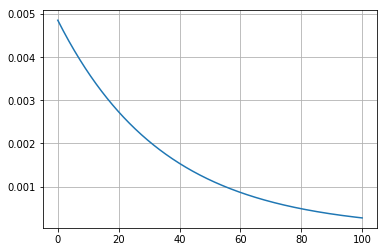

In [8]:
def calc_learning_rate(epoch):
    return 0.005 * math.pow(0.75, (1 + epoch) / 10)

epoch = np.linspace(0, 100, 500)
lrate = list(map(calc_learning_rate, epoch))
plt.plot(epoch, lrate);
plt.grid(True)

In [9]:
# def reset_weights(model):
#     session = K.get_session()
#     for layer in model.layers: 
#         if hasattr(layer, 'kernel_initializer'):
#             layer.kernel.initializer.run(session=session)

In [10]:
cb_learning_rate = LearningRateScheduler(calc_learning_rate)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [11]:
def gen_model():
    model = Sequential([
        BatchNormalization(input_shape=(IMG_H, IMG_W, X_train.shape[-1]), axis=-1),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=0.3),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# def gen_model():
#     model = Sequential([
#         BatchNormalization(input_shape=(IMG_H, IMG_W, 4), axis=-1),
#         Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), padding='valid'),
#         Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='valid'),
#         MaxPooling2D(pool_size=(2, 2), padding='valid'),
#         Flatten(),
#         Dense(1024, activation='relu'),
#         Dense(NUM_CLASSES, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
model = gen_model()

In [25]:
model.load_weights(r'0.88539\model_03.weights.h5')

history = model.fit_generator(
    aug_generator.flow(X_train, Y_train, batch_size=BATCH_SIZE),
    validation_data = (X_valid, Y_valid),
    epochs = NUM_EPOCHS + 50,
    steps_per_epoch = X_train.shape[0] // BATCH_SIZE,
    # callbacks = [cb_learning_rate, cb_early_stopping],
    callbacks = [cb_learning_rate],
    verbose=1,
    initial_epoch=50
)

result = np.argmax(model.predict(X_test), axis=1)     

C:\Programs\Anaconda3\lib\site-packages\keras_preprocessing\image.py:1404: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (4000, 28, 28, 7) (7 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 51/250
8/8 [==============================] - 3s 324ms/step - loss: 0.4720 - acc: 0.8312 - val_loss: 0.3897 - val_acc: 0.8613
Epoch 52/250
8/8 [==============================] - 3s 320ms/step - loss: 0.4854 - acc: 0.8268 - val_loss: 0.4081 - val_acc: 0.8627
Epoch 53/250
8/8 [==============================] - 3s 330ms/step - loss: 0.4819 - acc: 0.8293 - val_loss: 0.3838 - val_acc: 0.8587
Epoch 54/250
8/8 [==============================] - 3s 332ms/step - loss: 0.4600 - acc: 0.8380 - val_loss: 0.4171 - val_acc: 0.8440
Epoch 55/250
8/8 [==============================] - 3s 358ms/step - loss: 0.4810 - acc: 0.8308 - val_loss: 0.4359 - val_acc: 0.8480
Epoch 56/250
8/8 [==============================] - 3s 406ms/step - loss: 0.4729 - acc: 0.8253 - val_loss: 0.3632 - val_acc: 0.8600
Epoch 57/250
8/8 [==============================] - 3s 396ms/step - loss: 0.4822 - acc: 0.8293 - val_loss: 0.3806 - val_acc: 0.8627
Epoch 58/250
8/8 [==============================] - 3s 358ms/step - loss: 0.

Epoch 113/250
8/8 [==============================] - 4s 524ms/step - loss: 0.3416 - acc: 0.8788 - val_loss: 0.3104 - val_acc: 0.8933
Epoch 114/250
8/8 [==============================] - 4s 474ms/step - loss: 0.3271 - acc: 0.8810 - val_loss: 0.3068 - val_acc: 0.8933
Epoch 115/250
8/8 [==============================] - 3s 364ms/step - loss: 0.3369 - acc: 0.8750 - val_loss: 0.3016 - val_acc: 0.8920
Epoch 116/250
8/8 [==============================] - 3s 359ms/step - loss: 0.3405 - acc: 0.8762 - val_loss: 0.3144 - val_acc: 0.8840
Epoch 117/250
8/8 [==============================] - 3s 356ms/step - loss: 0.3361 - acc: 0.8713 - val_loss: 0.3093 - val_acc: 0.8933
Epoch 118/250
8/8 [==============================] - 3s 362ms/step - loss: 0.3367 - acc: 0.8810 - val_loss: 0.3067 - val_acc: 0.8920
Epoch 119/250
8/8 [==============================] - 3s 356ms/step - loss: 0.3288 - acc: 0.8820 - val_loss: 0.3019 - val_acc: 0.8920
Epoch 120/250
8/8 [==============================] - 3s 362ms/step - 

8/8 [==============================] - 3s 351ms/step - loss: 0.3183 - acc: 0.8825 - val_loss: 0.2931 - val_acc: 0.8960
Epoch 175/250
8/8 [==============================] - 3s 374ms/step - loss: 0.3045 - acc: 0.8893 - val_loss: 0.2909 - val_acc: 0.8947
Epoch 176/250
8/8 [==============================] - 3s 357ms/step - loss: 0.3111 - acc: 0.8843 - val_loss: 0.2927 - val_acc: 0.8947
Epoch 177/250
8/8 [==============================] - 3s 367ms/step - loss: 0.3156 - acc: 0.8845 - val_loss: 0.2965 - val_acc: 0.8960
Epoch 178/250
8/8 [==============================] - 3s 362ms/step - loss: 0.3078 - acc: 0.8893 - val_loss: 0.2947 - val_acc: 0.8987
Epoch 179/250
8/8 [==============================] - 3s 376ms/step - loss: 0.3205 - acc: 0.8888 - val_loss: 0.2944 - val_acc: 0.8947
Epoch 180/250
8/8 [==============================] - 3s 375ms/step - loss: 0.3173 - acc: 0.8855 - val_loss: 0.2953 - val_acc: 0.8933
Epoch 181/250
8/8 [==============================] - 4s 445ms/step - loss: 0.3152 -

Epoch 236/250
8/8 [==============================] - 3s 355ms/step - loss: 0.3000 - acc: 0.8903 - val_loss: 0.2966 - val_acc: 0.8960
Epoch 237/250
8/8 [==============================] - 3s 339ms/step - loss: 0.3221 - acc: 0.8827 - val_loss: 0.2966 - val_acc: 0.8947
Epoch 238/250
8/8 [==============================] - 3s 347ms/step - loss: 0.3218 - acc: 0.8830 - val_loss: 0.2969 - val_acc: 0.8947
Epoch 239/250
8/8 [==============================] - 3s 364ms/step - loss: 0.3230 - acc: 0.8803 - val_loss: 0.2966 - val_acc: 0.8973
Epoch 240/250
8/8 [==============================] - 3s 404ms/step - loss: 0.2999 - acc: 0.8930 - val_loss: 0.2964 - val_acc: 0.8973
Epoch 241/250
8/8 [==============================] - 3s 351ms/step - loss: 0.2969 - acc: 0.8942 - val_loss: 0.2969 - val_acc: 0.8973
Epoch 242/250
8/8 [==============================] - 3s 379ms/step - loss: 0.3091 - acc: 0.8928 - val_loss: 0.2972 - val_acc: 0.8973
Epoch 243/250
8/8 [==============================] - 3s 344ms/step - 

In [ ]:
# glob('test\*.png')[0].split('\\')[-1]

In [26]:
files = [path.split('\\')[-1] for path in glob('test\*.png')]
submit = pd.DataFrame({'file': files, 'species': le.inverse_transform(result)})

In [20]:
# submissions = pd.DataFrame({'ImageId': list(range(1, len(results1) + 1)), 'Label': results1})
# submissions.to_csv('kaggle_keras_09.2.csv', index=False, header=True)

In [27]:
submit.to_csv('model_05.csv', index=False)

In [28]:
model_json = model.to_json()
with open('model_05.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model_05.weights.h5')